## On the H-to-He ratio

### Solution for nuclei with spallation losses

The convection-diffusion equation for nuclei with spallation in the ISM:

$$-\frac{\partial}{\partial z} \left[ D \frac{\partial f}{\partial z} \right] + \frac{f}{\tau_{\rm sp}} = Q_0 \delta(z)$$

where the spallation time scale is given by

$$\tau_{\rm sp} = \frac{1}{n_{\rm ISM} \sigma_{\rm sp} v}$$

Here we approximate the gas density as $n_{\rm ISM} \sim 2 h n_d \delta(z)$, i.e we assume that the spallation process only occurs in the disk.

Assuming boundary conditions $f(z = \pm H) = 0$, the solution (see appendix) can be found: 

$$f_0 = \frac{Q_0 H}{2 D} \frac{1}{1 + \chi / \chi_{\rm sp}} = \frac{Q_0}{2 m_p n_d h v} \frac{\chi}{1 + \chi / \chi_{\rm sp}}$$



In [1]:
def grammage(R):
    """Compute grammage as a single power-law"""
    chi_0 = 10.
    R_0 = 4.
    delta = 0.34
    return chi_0 * (R / R_0)**(-delta) 

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


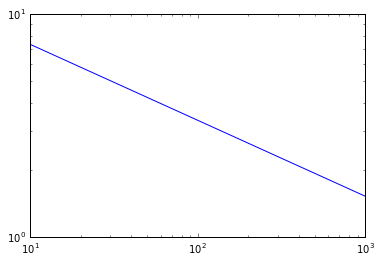

In [2]:
import matplotlib.pyplot as plt
import numpy as np
R = np.logspace(1, 3, 100)
plt.plot(R, grammage(R))
plt.xscale('log'), plt.yscale('log')
plt.show()

### Measurements of the H-to-He ratio (time interval > 2000)

In [21]:
def plot_data(filename, slope_plot, color, fmt):
    x, y, err_y_lo, err_y_up = np.loadtxt(filename,skiprows=2,usecols=(0,3,8,9),unpack=True)
    y_err = [x**slope_plot * err_y_lo, x**slope_plot * err_y_up]
    plt.errorbar(x, x**slope_plot * y, yerr=y_err, fmt=fmt, color=color)    

In [66]:
def model(x, c, g, x0, d):
    s = 0.1
    return c * (x / 50.)**(-g) * (1. + (x / x0)**(d / s))**s

In [92]:
def f(c, g, x0, d):
    chi2 = 0.0
    data_x, data_y, err_y_lo, err_y_up = np.loadtxt('data/AMS02.txt',skiprows=2,usecols=(0,3,8,9),unpack=True)
    m = model(data_x, c, g, x0, d)
    for i in range(len(data_x)):
        if data_x[i] > 30.:
            dist = 0.0
            if m[i] > data_y[i]:
                dist = (m[i] - data_y[i]) / err_y_up[i]
            else:
                dist = (m[i] - data_y[i]) / err_y_lo[i]
            chi2 += dist * dist
    return chi2

In [103]:
from iminuit import Minuit
def fit_data(filename):
    x, y, err_y_lo, err_y_up = np.loadtxt(filename,skiprows=2,usecols=(0,3,8,9),unpack=True)
    err_y = 0.5 * (err_y_up + err_y_lo)
    ind = (x > 30).nonzero()
    m, b = np.polyfit(np.log(x[ind]), np.log(y[ind]), 1) 
    #plt.plot(x, np.exp(b) * x**m)
    init_vals = [4.5, 0.1, 400., 0.1]
    minuit = Minuit(f, c = 4.5, error_c = 0.2,
        g = 0.1, error_g = 0.02,
        x0 = 300., error_x0 = 50.,
        d = 0.03, error_d = 0.01)
    minuit.migrad()
    model_y = model(x, 
                    minuit.values['c'], 
                    minuit.values['g'], 
                    minuit.values['x0'], 
                    minuit.values['d']) 
    plt.plot(x, x**0.07 * model_y)
    print m, b

/usr/local/Cellar/ipython@5/5.5.0_4/libexec/vendor/lib/python2.7/site-packages/ipykernel_launcher.py:12: InitialParamWarning: errordef is not given. Default to 1.
  if sys.path[0] == '':


FCN = 4.62257169821 
 TOTAL NCALL = 166 
 NCALLS = 166 
 
 
 EDM = 0.000151600798734 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 False 
 False 
 True 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Parab Error,Minos Error-,Minos Error+,Limit-,Limit+,FIXED
1,c,4.44023,0.201639,0,0,,,
2,g,0.0775942,0.032988,0,0,,,
3,x0,117.009,8626.23,0,0,,,
4,d,0.000525687,0.0676197,0,0,,,


-0.0778792777827 1.86472470614


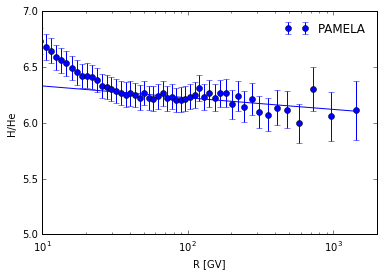

In [105]:
plt.close()
#plot_data('data/PAMELA.txt', 0, 'r', 'o')
plot_data('data/AMS02.txt', 0.07, 'b', 'o')
#plot_data('data/BESS-PolarII.txt', 0, 'g', 'o')
plt.xscale('log')
plt.ylim([5, 7]), plt.xlim([10, 2e3])
plt.xlabel('R [GV]'), plt.ylabel('H/He')
plt.legend(['PAMELA', 'AMS02', 'BESSII'], frameon=False)

fit_data('data/AMS02.txt')
plt.show()